
*Part 2: Python for Data Analysis III*
# Data wrangling with Pandas#

In the last tutorial we got to know some useful functions and methods to import, inspect, clean and export data.

The main focus of this tutorial will be on how to **prepare data for data analysis**.



## Getting help

In this class we will not be able to cover all aspects of Python. If you want more details, you can consult, for example, the **Python Standard Library Reference** at https://docs.python.org/3/library/ or the **Language Reference** at https://docs.python.org/3/reference/. But be warned: the amount of detail in these sources can be overwhelming. For **quick and easy-to-understand overviews** of different topics see, for example, https://www.w3schools.com/python/. Here are some specific references for today's tutorial:

*  Pandas: https://www.w3schools.com/python/pandas/default.asp
*  Statsmodels: https://www.statsmodels.org/stable/user-guide.html
*  Matplotlib: https://www.w3schools.com/python/matplotlib_pyplot.asp
*  Merging: https://pandas.pydata.org/docs/user_guide/merging.html


If you get stuck or don't remember how to do something, it is usually a good idea to **Google** your problem. Python has a large (and fast-growing) community and you will probably find answers to most of your questions online (e.g. on **Stack Overflow** or in a **Youtube tutorial**).

## Getting started

For this tutorial, we will work with the following datasets:

* ``life_satisfaction_clean.csv``
* ``trust_clean.csv``
* ``real-gdp-per-capita.csv``

You can find them in the following folder: https://drive.google.com/drive/u/0/folders/1_ToH44Kq7mhSM5p0fsYvEm_soAvWMBD3

Copy them to an appropriate folder on your computer or your Google Drive so you can follow along with the Tutorial. Let's import the modules we will use, mount our drive, change our working directory and load in the data:

In [1]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
os.chdir("../4_Data")

In [3]:
satisfaction = pd.read_csv("life_satisfaction_clean.csv", index_col="country")
trust = pd.read_csv("trust_clean.csv", index_col="country_code")
gdp = pd.read_csv("real-gdp-per-capita.csv")

If you didn't succeed to load the files, run the following lines of code to load them:

In [2]:
satisfaction = pd.read_csv("http://farys.org/daten/life_satisfaction_clean.csv",
                           index_col="country")

trust = pd.read_csv("http://farys.org/daten/trust_clean.csv",
                    index_col="country_code")

gdp = pd.read_csv("http://farys.org/daten/real-gdp-per-capita.csv")


## Combining datasets

When you work with data, you will often have to combine different datasets. There are four pandas functions or methods that allow you to do this:

* ``append`` method: Append rows
* ``concat`` function: Append rows or columns
* ``join`` method: Combine data on common indices
* ``merge`` function or method (both exist): Combine data on common columns or indices

In this tutorial, we will only focus on ``concat`` and ``merge``, as they allow you to do everything (and more) you can do with ``append`` and ``join``.


### Concatenating

Suppose you have your data in two different dataframes. Let's create this situation:

In [4]:
countries1 = satisfaction.loc[["Switzerland", "Tanzania", "Peru"],
                              ["continent", "life_satisfaction"]]
countries1

,continent,life_satisfaction
country,,
Switzerland,Europe,7.508587
Tanzania,Africa,3.445023
Peru,South America,5.679661


In [5]:
countries2 = satisfaction.loc[["China", "India"],
                              ["continent", "life_satisfaction"]]
countries2

,continent,life_satisfaction
country,,
China,Asia,5.131434
India,Asia,3.818069


Some countries are in ``countries1`` while others are in ``countries2``. How could we **combine them into a single dataframe**? The **``concat`` function** allows you to do this:

In [6]:
countries = pd.concat([countries1, countries2])
countries

,continent,life_satisfaction
country,,
Switzerland,Europe,7.508587
Tanzania,Africa,3.445023
Peru,South America,5.679661
China,Asia,5.131434
India,Asia,3.818069


As the (first) argument, you need to **provide a list of dataframes** (or series). Then, the rows are just stacked on top of each other.




You can also use ``concat`` to combine data **columnwise**. Suppose we have the following two dataframes we would like to combine:

In [7]:
countries_left = satisfaction.loc[["Switzerland", "Tanzania", "Peru"],
                                  ["continent", "life_satisfaction"]]
countries_left

,continent,life_satisfaction
country,,
Switzerland,Europe,7.508587
Tanzania,Africa,3.445023
Peru,South America,5.679661


In [8]:
countries_right = satisfaction.loc[["Switzerland", "Tanzania", "Peru"],
                                   ["gni_per_capita", "population"]]
countries_right

,gni_per_capita,population
country,,
Switzerland,85670.0,8297000.0
Tanzania,980.0,51483000.0
Peru,6340.0,30471000.0


To **concatenate dataframes columnwise, we need to set the ``axis`` parameter to 1**:

In [9]:
countries = pd.concat([countries_left, countries_right], axis=1)
countries

,continent,life_satisfaction,gni_per_capita,population
country,,,,
Switzerland,Europe,7.508587,85670.0,8297000.0
Tanzania,Africa,3.445023,980.0,51483000.0
Peru,South America,5.679661,6340.0,30471000.0


Now the columns from ``countries_left`` and the columns from ``countries_right`` are combined into one dataframe.

### Merging (one-to-one)

Now suppose you would like to combine the life satisfaction data (``satisfaction``) with the trust data (``trust``). Both datasets contain information on several countries and you would like to combine the data in a way such that the countries are matched. How could this be done? You could try to concatenate the two datasets, but this is very risky. It will not work if the number  or order of the countries differs and you may get things mixed up. It would be better to **combine the data based on the index or the values of some column(s)** (e.g. the country code).

The **``merge`` function or method** (`merge` exists as a function and as a method) allows you to do this. The basic syntax is

```python
new_df = pd.merge(left_df, right_df, ...) # function
new_df = left_df.merge(right_df, ...)     # method
```

where `left_df` and `right_df` are the two dataframes you want to combine. In the examples below, we will use the method syntax.

Let's take a look at our two dataframes:

In [10]:
satisfaction.head()

,code,gni_per_capita,life_satisfaction,population,continent,workhours,income_level
country,,,,,,,
Afghanistan,AFG,600.0,2.694303,34414000.0,Asia,NaN,Low income
Albania,ALB,4390.0,5.004403,2891000.0,Europe,NaN,Upper middle income
Algeria,DZA,4850.0,5.043086,39728000.0,Africa,NaN,Upper middle income
Argentina,ARG,12570.0,5.792797,43075000.0,South America,1691.5363,High income
Armenia,ARM,4010.0,5.062449,2926000.0,Asia,NaN,Lower middle income


In [11]:
trust.head(7)

,country_name,continent,trust
country_code,,,
ARG,Argentina,South America,22.64706
ARM,Armenia,Asia,10.01821
AUS,Australia,Oceania,54.43383
AZE,Azerbaijan,Asia,16.16766
BHR,Bahrain,Asia,33.50000
BLR,Belarus,Europe,32.80737
BRA,Brazil,South America,6.52759


Before we can merge the dataframes, we need to decide **on what we want to merge them**. We can merge dataframes **by the index or by column values**. The merge method has the following parameters to specify this:
* **``left_index``**: Set to ``True`` if the left dataframe should be **merged on the index**
* **``right_index``**: Set to ``True`` if the right dataframe should be **merged on the index**
* **``left_on``**: Specify what **column(s)** from the left dataframe should be taken for the merge
* **``right_on``**: Specify what **column(s)** from the left dataframe should be taken for the merge
* **``on``**: Specify the name of the **column(s)** for the merge if the column name(s) is/are the **same in both datasets**

Let's try **merge by the index of both dataframes**:

In [13]:
df = satisfaction.merge(trust,
                        left_index=True,   # use index from left dataframe for merge
                        right_index=True)  # use index from right dataframe for merge
df.head(2)

,code,gni_per_capita,life_satisfaction,population,continent_x,workhours,income_level,country_name,continent_y,trust


What happened? Since the index is not the same between the two datasets (country names in `satisfaction` and country codes in `trust`), there were no matches and we created an empty dataset.

In many cases, you will have to **merge on column values** instead of the index. In our case, we could merge on the country code. The country code is in column ``code`` in ``satisfaction`` (the left dataframe) and in the index in ``trust``(the right dataframe). So we have to merge on column `code` for the left dataframe and on the index for the right dataframe:

In [14]:
df = satisfaction.merge(trust,
                        left_on="code",
                        right_index=True)

df.head(2)

,code,gni_per_capita,life_satisfaction,population,continent_x,workhours,income_level,country_name,continent_y,trust
country,,,,,,,,,,
Algeria,DZA,4850.0,5.043086,39728000.0,Africa,NaN,Upper middle income,Algeria,Africa,17.92863
Argentina,ARG,12570.0,5.792797,43075000.0,South America,1691.5363,High income,Argentina,South America,22.64706


> <font color = ff00ff>SIDENOTE: Even though `country_code` is the index in the right dataframe and not a column, we can treat it in `merge()` as if it was a column; `merge()` is smart enough to understand what we mean. That is, we can also merge the datasets as follows:
>
>
>```python
df = satisfaction.merge(trust,
                        left_on="code",
                        right_on="country_code")
```
>
><font color = 4e1585>A slight difference is that in the second variant of the code the index is not passed on to the new dataframe (which makes sense because the index is not the same in the two datasets).
>
>
><font color = 4e1585>Moreover, you can also **merge on several columns**. For example, if you worry that different countries may have the same country code, you could additionally match on continent. Observations are then only merged if both the country code and the continent are the same:
>
> ```python
> df = satisfaction.merge(trust,
                        left_on=["code", "continent"],
                        right_on=["country_code", "continent"])
```



Let's think a bit more closely about what happened when we merged the ``satisfaction`` and the ``trust`` dataset. Consider the length of the two datasets:

In [15]:
print(len(satisfaction))
print(len(trust))

126
55


Clearly, there must be countries that are in ``satisfaction`` but not in ``trust``. There may also be countries that are in ``trust`` but not in ``satisfaction``. How does the ``merge`` method handle these cases?

By default, ``merge`` performs an ``inner join`` -- only observations that are in both dataframes are included. This is why our merged dataframe ``df`` has fewer observations than ``satisfaction`` and ``trust``:

In [16]:
print(len(df))

48




The**``how`` parameter allows you to specify what observations should be included** in the merged dataframe. There are 4 possibilities:

* **``inner`` join**: Only observations that are in *both* dataframes are included. This is the default.
* **``outer`` join**: *All* observations are included.
* **``left`` join**: All observations from the *left* dataset (i.e. ``satisfaction``) are included.
* **``right`` join**: All observations from the *right* dataset (i.e. ``trust``) are included.

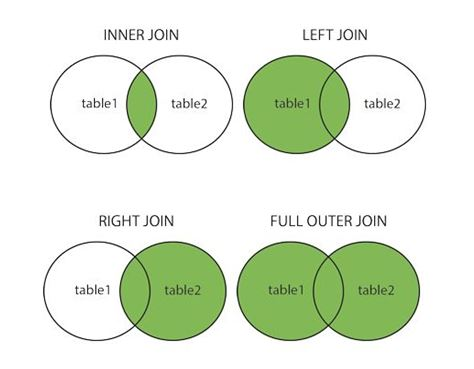

Let's perform an outer join, so we do not loose any observations:

In [17]:
df = satisfaction.merge(trust,
                        how="outer",  # set type of join
                        left_on="code",
                        right_on="country_code",
                        indicator=True)  # add a column with merging information
df.head(3)

,code,gni_per_capita,life_satisfaction,population,continent_x,workhours,income_level,country_name,continent_y,trust,_merge
0,AFG,600.0,2.694303,34414000.0,Asia,NaN,Low income,NaN,NaN,NaN,left_only
1,ALB,4390.0,5.004403,2891000.0,Europe,NaN,Upper middle income,NaN,NaN,NaN,left_only
2,ARE,42860.0,6.603744,9263000.0,Asia,NaN,High income,NaN,NaN,NaN,left_only


Since we set the `indicator` parameter to `True`, a column named ``_merge`` was added to the dataframe that contains information on the source of an observation. Let's take a look at it:

In [18]:
df["_merge"].value_counts()

_merge
left_only     78
both          48
right_only     7
Name: count, dtype: int64

As we can see, most of the observations only appeared in the ``satisfaction`` dataframe, some appeared in both dataframes and very few only appeared in the ``trust`` dataframe.

> <font color = 4e1585>SIDENOTE: Merging datasets from different sources often requires a lot of tedious data cleaning. For example, if you merge on country names, the spelling of these names may differ across datasets meaning that these countries will not be merged. It may be a good idea to start with an outer merge and inspect the observations that appear only in one of the datasets. If available, (standardized) codes are usually much better for merging than names.  

---

>  <font color='teal'> **In-class exercise**:
Consider the following two dataframes:  

In [19]:
my_data1 = satisfaction.loc[["Switzerland", "Tanzania", "Peru", "China"],
                            ["code", "life_satisfaction"]].reset_index()

my_data2 = satisfaction.loc[["Tanzania", "India", "Peru", "China"],
                            ["code", "gni_per_capita", "workhours"]].reset_index()
my_data2.loc[3, "country"] = " People's Republic of China"

In [20]:
my_data1

,country,code,life_satisfaction
0,Switzerland,CHE,7.508587
1,Tanzania,TZA,3.445023
2,Peru,PER,5.679661
3,China,CHN,5.131434


In [21]:
my_data2

,country,code,gni_per_capita,workhours
0,Tanzania,TZA,980.0,NaN
1,India,IND,1600.0,2117.0117
2,Peru,PER,6340.0,1932.4581
3,People's Republic of China,CHN,7940.0,2174.3501


>  <font color='teal'> How could you combine them into one keeping all observations from ``my_data1``?


In [24]:
combined_my_data = my_data1.merge(
    my_data2,
    how="left",
    left_on="country",
    right_on="country"
)
combined_my_data

,country,code_x,life_satisfaction,code_y,gni_per_capita,workhours
0,Switzerland,CHE,7.508587,NaN,NaN,NaN
1,Tanzania,TZA,3.445023,TZA,980.0,NaN
2,Peru,PER,5.679661,PER,6340.0,1932.4581
3,China,CHN,5.131434,NaN,NaN,NaN




---



### Many-to-one merging

> <font color = 4e1585>SIDENOTE: The merge method also allows you to perform **many-to-many** or **one-to-many** joins. If you would like know more about different types of joins, see, for example: https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

Up to now, we have only conducted **one-to-one joins**. Each observation in your left dataset was merged to one observation from the right dataset (or to none, if none was found). Sometimes you will also want to conduct **many-to-one** joins. This means that several observations from your left dataset will be merged to the same observation in your right dataset. Consider the following two example datasets:

In [25]:
df1 = pd.DataFrame({"year": [2000, 2019, 2000, 2019],
                    "gdp_per_cap": [37868, 81994, 411, 1122]},
                   index=["Switzerland", "Switzerland", "Tanzania", "Tanzania"])
df1

,year,gdp_per_cap
Switzerland,2000,37868
Switzerland,2019,81994
Tanzania,2000,411
Tanzania,2019,1122


In [26]:
df2 = pd.DataFrame({"continent": ["Europe", "Africa"]},
                   index=["Switzerland", "Tanzania"])
df2

,continent
Switzerland,Europe
Tanzania,Africa


How could you merge these two datasets? Performing many-to-one joins with pandas is straightforward, as **pandas will infer automatically what kind of join to perform**:

In [27]:
df1.merge(df2, left_index=True, right_index=True)

,year,gdp_per_cap,continent
Switzerland,2000,37868,Europe
Switzerland,2019,81994,Europe
Tanzania,2000,411,Africa
Tanzania,2019,1122,Africa


Before you merge, **always be sure that you are perfectly aware of the structure** (especially duplicates) of your data! Consider the following example:

In [28]:
df_dup = pd.DataFrame({"continent": ["Europe", "Africa"]},
                      index=["Switzerland", "Switzerland"])  # Switzerland ist duplicated
df1.merge(df_dup, left_index=True, right_index=True,
          how="left")  # introduces duplicates on the left side as well!

df_dup.index.is_unique

False

Or another example:

In [ ]:
# First DataFrame with duplicates in the merge key
df1 = pd.DataFrame({
    'ID': [1, 2, 2, 3],
    'Value_A': ['A1', 'A2', 'A3', 'A4']
})

# Second DataFrame with unique keys
df2 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Value_B': ['B1', 'B2', 'B3']
})

# Merge on 'ID'
merged_df = pd.merge(df1, df2, on='ID', how='inner')

print(merged_df)

However, with duplicates on both sides:

In [ ]:
df2 = pd.DataFrame({
    'ID': [1, 2, 2, 3],
    'Value_B': ['B1', 'B2', 'B3', 'B4']
})

merged_df = pd.merge(df1, df2, on='ID', how='inner')

print(merged_df)

   ID Value_A Value_B
0   1      A1      B1
1   2      A2      B2
2   2      A2      B3
3   2      A3      B2
4   2      A3      B3
5   3      A4      B4


## Grouping data

Our life satisfaction data contains a variable classifying the countries by income level. Suppose you would like to look at the **average life satisfaction by income group**. How could we do this? One way would be to filter the data and print the result for each country group:

In [ ]:
satisfaction

In [29]:
print(satisfaction.loc[satisfaction["income_level"] == "High income",
                       "life_satisfaction"].mean())
print(satisfaction.loc[satisfaction["income_level"] == "Upper middle income",
                       "life_satisfaction"].mean())
# etc.

6.709778873605262
5.4779970284848485


This can get very tedious, especially if you have many categories/groups. The **``groupby()`` method allows you to split your data into groups and to easily compute summary statistics (or do operations) for each group**. Let's group our data by income level:

In [30]:
grouped_df = satisfaction.groupby("income_level")
print(grouped_df)

Using the **``get_group()`` method**, we can retrieve all observations belonging to a particular group:

In [31]:
grouped_df.get_group("Low income")

,code,gni_per_capita,life_satisfaction,population,continent,workhours,income_level
country,,,,,,,
Afghanistan,AFG,600.0,2.694303,34414000.0,Asia,NaN,Low income
Burkina Faso,BFA,700.0,4.927236,18111000.0,Africa,NaN,Low income
Burundi,BDI,260.0,3.775283,10160000.0,Africa,NaN,Low income
Chad,TCD,880.0,4.486325,14111000.0,Africa,NaN,Low income
Ethiopia,ETH,600.0,4.379262,100835000.0,Africa,NaN,Low income
Guinea,GIN,760.0,5.252227,11432000.0,Africa,NaN,Low income
Liberia,LBR,630.0,4.134853,4472000.0,Africa,NaN,Low income
Madagascar,MDG,490.0,4.070587,24234000.0,Africa,NaN,Low income
Malawi,MWI,350.0,3.334634,16745000.0,Africa,NaN,Low income


Now we can compute the mean (or other summary statistics) for each group:

In [32]:
grouped_df["life_satisfaction"].mean()

income_level
High income            6.709779
Low income             4.214145
Lower middle income    5.016864
Upper middle income    5.477997
Name: life_satisfaction, dtype: float64

We can also use ``groupby()`` to create an aggregated dataframe:

In [33]:
ls_byincome = grouped_df["life_satisfaction"].agg(["mean", "median", "count"])
ls_byincome

,mean,median,count
income_level,,,
High income,6.709779,6.774294,38
Low income,4.214145,4.313699,18
Lower middle income,5.016864,5.062449,37
Upper middle income,5.477997,5.433216,33


If you want to have the group label as a data column rather than the index, you can add `reset_index()`:

In [34]:
grouped_df["life_satisfaction"].agg(["mean", "median", "count"]).reset_index()

,income_level,mean,median,count
0,High income,6.709779,6.774294,38
1,Low income,4.214145,4.313699,18
2,Lower middle income,5.016864,5.062449,37
3,Upper middle income,5.477997,5.433216,33


By the way: the .agg() method can also take a self-written function as elements:

In [36]:
def mean2(x):
    return x.mean()


grouped_df["life_satisfaction"].agg(["mean", "median", "count", mean2]).reset_index()

,income_level,mean,median,count,mean2
0,High income,6.709779,6.774294,38,6.709779
1,Low income,4.214145,4.313699,18,4.214145
2,Lower middle income,5.016864,5.062449,37,5.016864
3,Upper middle income,5.477997,5.433216,33,5.477997


><font color = ff0ff> SIDENOTE: You can also group your data by several columns (e.g. ``df.groupby(["income_level", "continent"])``. If you want to know more about grouping data, see, for example:
* https://pandas.pydata.org/docs/user_guide/groupby.html

---

>  <font color='teal'> **In-class exercise**:
You would like to know how many hours people work in a typical country on each continent. Use the ``groupby()`` method compute the median of `workhours` by continent!

In [52]:
workhours_median = satisfaction.groupby("continent")["workhours"].median()
workhours_median

continent
Africa           1956.28485
Asia             2159.07805
Europe           1699.49910
North America    1961.04640
Oceania          1752.00450
South America    1709.48560
Name: workhours, dtype: float64

>  <font color='teal'> Now create a summary dataframe called ``workhours_by_continent`` with the median of `workhours` and the number of countries by continent.

In [60]:
workhours_by_continent = satisfaction.groupby("continent")["code"].agg(["count"]).merge(
    workhours_median,
    on="continent"
)
workhours_by_continent
satisfaction.groupby("continent")["workhours"].agg(["median", "count"])

,median,count
continent,,
Africa,1956.28485,2
Asia,2159.07805,16
Europe,1699.49910,29
North America,1961.04640,4
Oceania,1752.00450,2
South America,1709.48560,7




---



## Reshaping data

Two-dimensional data can often be displayed in two different formats: **long** or **wide**. Consider the following dataframe:

In [54]:
df_long = pd.DataFrame({"country": ["Switzerland", "Switzerland", "Tanzania", "Tanzania"],
                        "year": [2000, 2019, 2000, 2019],
                        "gdp_per_cap": [37868, 81994, 411, 1122]})
df_long

,country,year,gdp_per_cap
0,Switzerland,2000,37868
1,Switzerland,2019,81994
2,Tanzania,2000,411
3,Tanzania,2019,1122


We call this dataframe **long** because there are multiple/repeated observations (gdp per year) per observational unit (country). Another representation of the data would be to have each country just once and have additional columns which describe the gdp at different years. That we would call **wide** data.

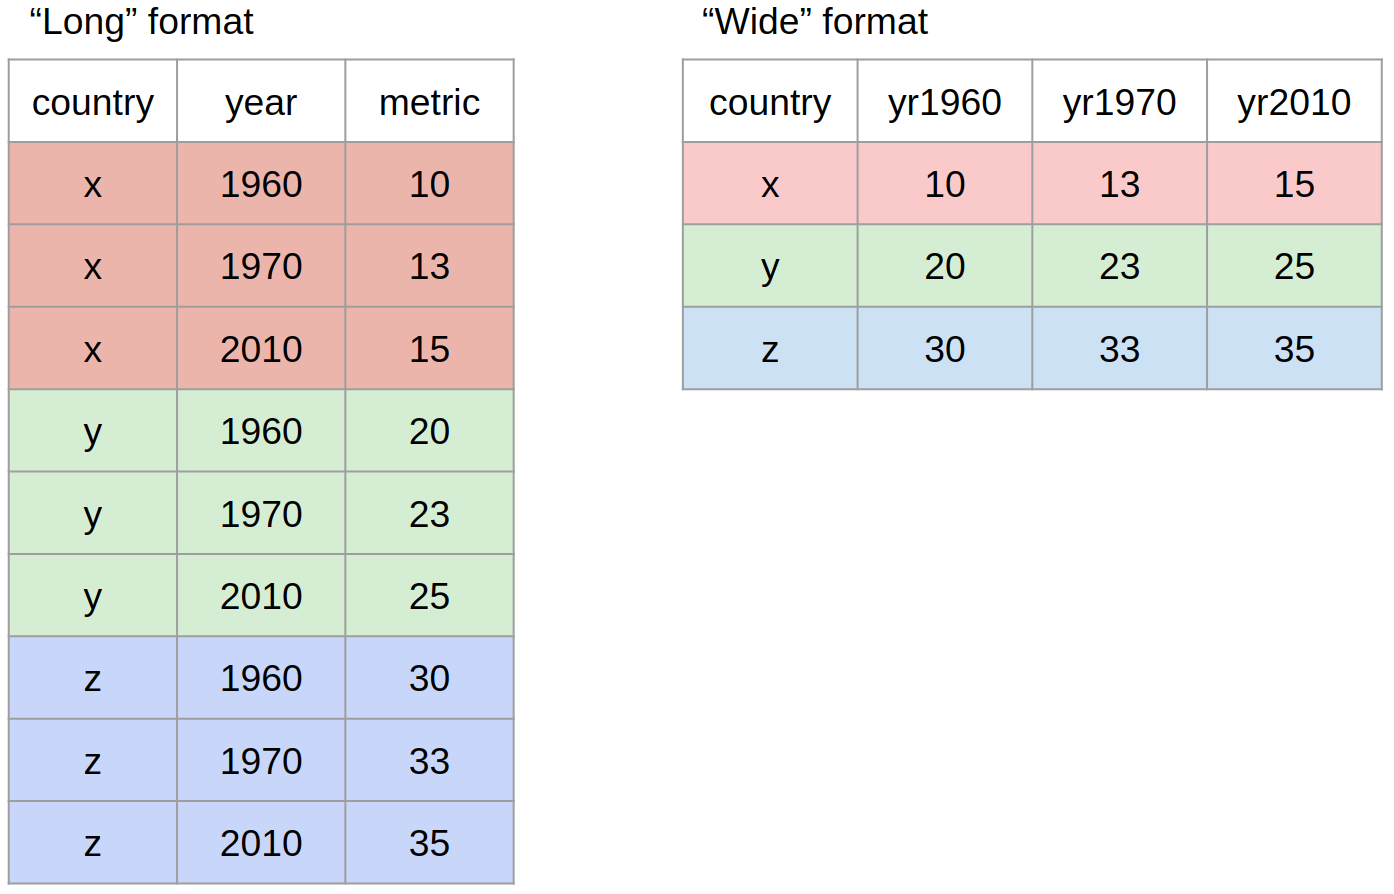

In [56]:
df_wide = df_long.pivot(index="country", columns="year", values="gdp_per_cap")
df_wide

year,2000,2019
country,,
Switzerland,37868,81994
Tanzania,411,1122


In [57]:
print(df_wide.columns)
print(df_wide.index)

Index([2000, 2019], dtype='int64', name='year')
Index(['Switzerland', 'Tanzania'], dtype='object', name='country')


That does not look very clean as we get hierarchical columns. We can solve that by resetting the index:

In [58]:
df_wide = df_wide.reset_index()
df_wide

year,country,2000,2019
0,Switzerland,37868,81994
1,Tanzania,411,1122


Further, you might consider to first change the values of ``year`` in a way that they are proper column names, e.g. ``"gdp_2000"`` instead of ``2000``.

In [59]:
df_long["colnames"] = "gdp_" + df_long["year"].astype(str)  # <- not ideal
df_wide = df_long.pivot(index="country", columns="colnames",
                        values="gdp_per_cap").reset_index()
df_wide

colnames,country,gdp_2000,gdp_2019
0,Switzerland,37868,81994
1,Tanzania,411,1122


In [63]:
df_wide = df_long.pivot(index="country", columns="year", values="gdp_per_cap")

# Or: rename columns after pivoting
df_wide.columns = [f"gdp_{col}" for col in df_wide.columns]

df_wide = df_wide.reset_index()
df_wide

,country,gdp_2000,gdp_2019
0,Switzerland,37868,81994
1,Tanzania,411,1122


In the other direction you can also reshape from a wide to a long format using ``melt()`` or ``wide_to_long()``:

In [61]:
df_long2 = pd.melt(df_wide, id_vars="country",
                   value_vars=["gdp_2000", "gdp_2019"],
                   var_name="year",
                   value_name="gdp_per_cap")
df_long2["year"] = (df_long2["year"].str.split("_").str[1]
                    .astype(int))  # change values from e.g. "gdp_2000" to 2000 (integer)
df_long2

,country,year,gdp_per_cap
0,Switzerland,2000,37868
1,Tanzania,2000,411
2,Switzerland,2019,81994
3,Tanzania,2019,1122


Reshaping tasks can often be pretty complicated and confusing. You can read additional information in the pandas reference: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html>. If you run into problems with reshaping: start small! Use tiny examples, try your code, and carefully inspect what it does.

---

>  <font color='teal'> **In-class exercise**:
Generate the following dataframe:

In [64]:
df = pd.DataFrame({"name": ["John Smith", "Jane Doe", "Mary Johnson"],
                   "treatmentA": [5, 10, 8], "treatmentB": [12, 10, 9]})
df

,name,treatmentA,treatmentB
0,John Smith,5,12
1,Jane Doe,10,10
2,Mary Johnson,8,9


---

>  <font color='teal'> Reshape the dataset in a way that you have a column ``treatment`` with possible values ``A`` and ``B`` and the measured value as ``value``. Assign the result to a new dataframe ``df_long``.

In [67]:
df_long = pd.melt(df,
                  id_vars="name",
                  value_vars=["treatmentA", "treatmentB"],
                  var_name="treatment",
                  value_name="value")
df_long

,name,treatment,value
0,John Smith,treatmentA,5
1,Jane Doe,treatmentA,10
2,Mary Johnson,treatmentA,8
3,John Smith,treatmentB,12
4,Jane Doe,treatmentB,10
5,Mary Johnson,treatmentB,9


In [74]:
# We might want to clean the new column a bit:
df_long["treatment"] = df_long["treatment"].str.replace("treatment", "")
df_long

,name,treatment,value
0,John Smith,A,5
1,Jane Doe,A,10
2,Mary Johnson,A,8
3,John Smith,B,12
4,Jane Doe,B,10
5,Mary Johnson,B,9


---

>  <font color='teal'> Now, reshape the ``df_long`` dataframe back to a wide format.

In [76]:
df_wide = pd.pivot(df_long,
                   index="name",
                   columns="treatment",
                   values="value").reset_index()
df_wide

treatment,name,A,B
0,Jane Doe,10,10
1,John Smith,5,12
2,Mary Johnson,8,9
